# Exact confidence intervals: difference between two normal means

**date**
: 2021-04-16

**aim:** Calculate a **100(1-a)%** exact confidence interval for the difference between two normal means.

**reference:** Computer book B, Activity 22

**data:** `skulls.csv`

**description:** Maximum skull breadth (in mm) of 84 skulls of Etruscan males and 70 skulls of modern Italian males.

**modules:** `scipy.stats.t` `scipy.stats.probplot`

## Setup

In [1]:
from setup import load
from scipy.stats import t, probplot
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_dof(a, b) -> int:
    """
    Calculates the degrees of freedom of two samples.
    @params a,b
        array-like objects
    """
    return a.size + b.size - 2

In [3]:
def get_ese(a, b) -> float:
    """
    Calculates the estimated standard error of two samples.
    @params a,b
        array-like objects
    """
    # pooled_var
    num = ((a.size - 1) * a.var() + (b.size - 1) * b.var())
    denom = get_dof(a, b)
    pooled_var = num/denom
    return sqrt(pooled_var) * sqrt(1/a.size + 1/b.size)

In [4]:
# import the sample
skulls = load.skulls()

In [5]:
# declare local vars
etr = skulls["Etruscans"].dropna()
ita = skulls["Italians"].dropna()

## Describe

### Preview the data

In [6]:
skulls.head()

,Etruscans,Italians
0,141,133.0
1,148,138.0
2,132,130.0
3,138,138.0
4,154,134.0


### Summarise the data

In [7]:
skulls.describe()

,Etruscans,Italians
count,84.000000,70.000000
mean,143.773810,132.442857
std,5.970512,5.749948
min,126.000000,116.000000
25%,140.000000,129.000000
50%,143.500000,132.000000
75%,148.000000,136.750000
max,158.000000,148.000000


### Visualise the data

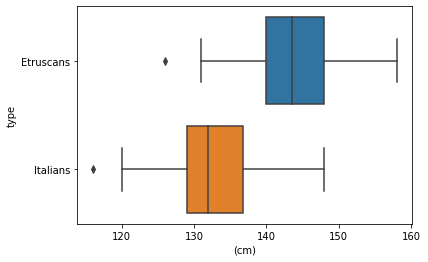

In [8]:
ax = sns.boxplot(x="value", y="variable", data=pd.melt(skulls))
ax.set(xlabel="(cm)", ylabel="type")
plt.show()

## Results

### Check assumptions

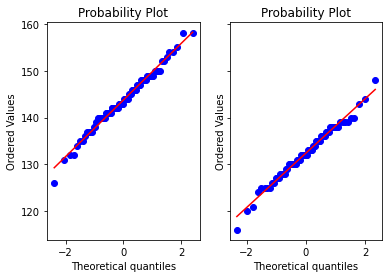

In [9]:
# check normality using normal probability plots
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1 = probplot(x=etr, plot=ax1)
ax1 = probplot(x=ita, plot=ax2)
plt.show()

In [10]:
# check common var
etr.var()/ita.var()

1.078190046662236

In [11]:
get_dof(etr, ita)

152

In [12]:
get_ese(etr, ita)

0.9501987648612074

### Calculations

In [13]:
# get difference, degree of freedom, and estimated stand error
# included for clarity
dof = get_dof(etr, ita)
diff = etr.mean() - ita.mean()
ese = get_ese(etr, ita)

In [14]:
# calculate the ci
t.interval(
    alpha=0.95,
    df=dof,
    loc=diff,
    scale=ese
)

(9.453650451007142, 13.208254310897594)